# **Individual Assingment**: Default Credit Cards Clients

A bank in you region want to build a model to predict credit card defaulters more accurately in order minimize money loss. For this task we have a set of data on default payments and demographic data to help us do our task. Data is comprised in the following CSV files:


**TRAINING**

**`train_customers.csv`**
 - `ID`: ID of each client
 - `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - `SEX`: Gender (1=male, 2=female)
 - `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
 - `AGE`: Age in years
 
**`train_series.csv`**
 - `ID`: ID of each client
 - `MONTH`: The month to wich data is refering
 - `PAY`: Repayment status in the corresponding month (-2=no need to pay, zero balance, -1=pay duly, 0=revolving credit (meaning client paid more than the minimum payment, but less than the total balance), 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 - `BILL_AMT`: Amount of bill statement in the corresponding month (NT dollar)
 - `PAY_AMT`: Amount of previous payment in the corresponding month (NT dollar)
 
**`train_target.csv`**
 - `DEFAULT_JULY`: Default payment in July (1=yes, 0=no)
 
 
**TEST** (For PART 3)
 - **`test_data.csv`**
 
**SUBMISSION** (For PART 3)
 - **`submission_features.csv`**
 
**BACKUP**
 - **`train_data.csv`**

Load all data and answer the following questions

## **A. DATA ENGINEERING (3 points)**

### **Question 1**

(2 points)

> Load the train_series.csv file and pivot the time-dependent columns (PAY, BILL_AMT, and PAY_AMT) to build one column of these per month. (Ex. PAY_JUNE, PAY_MAY, ..., BILL_AMT_JUNE, ...)

In [607]:
import pandas as pd
import numpy as np

In [131]:
train_series = pd.read_csv('train_series.csv')

In [132]:
train_series.sample(2)

,ID,MONTH,PAY,BILL_AMT,PAY_AMT
9184,26741,FEBRUARY,3.0,300.0,0.0
42271,1009,MAY,0.0,14757.0,1600.0


In [133]:
months = list(train_series['MONTH'].unique())
months

['JUNE', 'MAY', 'APRIL', 'MARCH', 'FEBRUARY', 'JANUARY']

In [794]:

for month in months:
    train_series[f'PAY_{month}'] = train_series[train_series['MONTH'] == month]['PAY']
    train_series[f'BILL_AMT_{month}'] = train_series[train_series['MONTH'] == month]['BILL_AMT']
    train_series[f'PAY_AMT_{month}'] = train_series[train_series['MONTH'] == month]['PAY_AMT']

In [795]:
train_series

,ID,MONTH,PAY,BILL_AMT,PAY_AMT,PAY_JUNE,BILL_AMT_JUNE,PAY_AMT_JUNE,PAY_MAY,BILL_AMT_MAY,...,PAY_AMT_APRIL,PAY_MARCH,BILL_AMT_MARCH,PAY_AMT_MARCH,PAY_FEBRUARY,BILL_AMT_FEBRUARY,PAY_AMT_FEBRUARY,PAY_JANUARY,BILL_AMT_JANUARY,PAY_AMT_JANUARY
0,9910,JUNE,0.0,76885.0,3500.0,0.0,76885.0,3500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9910,MAY,0.0,79106.0,4000.0,NaN,NaN,NaN,0.0,79106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9910,APRIL,0.0,81231.0,3000.0,NaN,NaN,NaN,NaN,NaN,...,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9910,MARCH,0.0,81983.0,3146.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,81983.0,3146.0,NaN,NaN,NaN,NaN,NaN,NaN
4,9910,FEBRUARY,0.0,83773.0,3260.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,83773.0,3260.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,19966,MAY,2.0,22083.0,5.0,NaN,NaN,NaN,2.0,22083.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119996,19966,APRIL,2.0,15444.0,1000.0,NaN,NaN,NaN,NaN,NaN,...,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119997,19966,MARCH,0.0,13695.0,5000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,13695.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN
119998,19966,FEBRUARY,0.0,17598.0,1000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,17598.0,1000.0,NaN,NaN,NaN


In [796]:
train_series.drop(['MONTH','PAY','BILL_AMT','PAY_AMT'], axis = 1, inplace = True)

In [797]:
train_series.bfill(inplace = True)

In [798]:
train_series.drop_duplicates('ID', keep='first',inplace=True, ignore_index= True)

In [799]:
train_series = train_series[['ID', 'PAY_JUNE','PAY_MAY','PAY_APRIL','PAY_MARCH','PAY_FEBRUARY','PAY_JANUARY',
                   'BILL_AMT_JUNE','BILL_AMT_MAY','BILL_AMT_APRIL','BILL_AMT_MARCH','BILL_AMT_FEBRUARY','BILL_AMT_JANUARY',
                  'PAY_AMT_JUNE','PAY_AMT_MAY','PAY_AMT_APRIL','PAY_AMT_MARCH','PAY_AMT_FEBRUARY','PAY_AMT_JANUARY']]

In [800]:
train_series

,ID,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,PAY_FEBRUARY,PAY_JANUARY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
0,9910,0.0,0.0,0.0,0.0,0.0,0.0,76885.0,79106.0,81231.0,81983.0,83773.0,85532.0,3500.0,4000.0,3000.0,3146.0,3260.0,3200.0
1,15561,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4823.0,5471.0,8422.0,4377.0,3910.0,2431.0,5491.0,9683.0,4377.0,3918.0,2431.0,2120.0
2,23607,0.0,0.0,2.0,0.0,0.0,0.0,243621.0,259517.0,253863.0,257535.0,262753.0,268145.0,21400.0,0.0,9400.0,9542.0,9766.0,9786.0
3,6314,0.0,0.0,0.0,0.0,0.0,0.0,29832.0,18628.0,15069.0,15761.0,5879.0,-2879.0,1538.0,1308.0,1000.0,118.0,1329.0,41378.0
4,27534,-2.0,-2.0,-1.0,-1.0,-1.0,-1.0,4500.0,2580.0,178.0,1500.0,0.0,1118.0,2580.0,178.0,1500.0,0.0,1118.0,1331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,28636,1.0,-2.0,-2.0,-1.0,2.0,2.0,-200.0,-200.0,-200.0,150.0,150.0,350.0,0.0,0.0,350.0,0.0,200.0,0.0
19996,17730,0.0,0.0,0.0,0.0,0.0,0.0,59236.0,53689.0,48551.0,34656.0,18077.0,18815.0,2000.0,2124.0,2047.0,5618.0,1000.0,2000.0
19997,28030,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,3339.0,13047.0,7764.0,623.0,4695.0,4133.0,10000.0,7764.0,623.0,4695.0,5973.0,4421.0
19998,15725,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-7.0,1765.0,5074.0,19268.0,5606.0,2534.0,1772.0,5099.0,19364.0,5634.0,2547.0,33300.0


### **Question 2**

(0.5 points)

> Load train_customers.csv and include the pivoted table of time series data. The resulting table must be a table with one row per customer (ID)

In [142]:
train_customers = pd.read_csv('train_customers.csv')
train_customers.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
9992,13058,140000.0,1,2,1,48
17788,9560,350000.0,2,2,1,31
11614,29676,50000.0,1,3,1,41


In [143]:
train_customers['ID'].nunique()

20000

In [801]:
train_macrotable = train_customers.merge(train_series, how= 'right', on= 'ID')

In [802]:
train_macrotable['ID'].nunique()

20000

### **Question 3**

(0.5 points)

Include information from the target (train_target.csv) on the table

surnamename_A_train.csv - This is the resulting CSV after applying all transformations exposed in questions A.1, A.2 and A.3.

In [803]:
train_target = pd.read_csv("train_target.csv")
train_target.sample(2)

,ID,DEFAULT_JULY
9610,25049,1
9451,9014,0


In [804]:
train_macrotable = train_macrotable.merge(train_target, how= 'right', on= 'ID')

In [805]:
train_macrotable.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,DEFAULT_JULY
5253,22094,50000.0,2,3,1,51,0.0,0.0,0.0,0.0,...,17398.0,17773.0,17368.0,2017.0,2130.0,500.0,2000.0,2000.0,2000.0,1
9106,25145,110000.0,1,1,2,28,0.0,0.0,0.0,0.0,...,98139.0,72176.0,74011.0,4000.0,4000.0,4100.0,3000.0,3000.0,3000.0,0
9488,29102,100000.0,1,2,2,38,0.0,0.0,0.0,0.0,...,45433.0,3952.0,3723.0,1994.0,19462.0,3000.0,302.0,3723.0,15462.0,0


In [806]:
train_macrotable.to_csv('mysubmissions/vanmeijelniels_A_train.csv')

## **B. EXPLORATORY DATA ANALYSIS (2 points)**

### **Question 1**

(0.5 points)

BAR PLOT: Plot the distribution of defaulters given the Education. Comment the results.

In [758]:
q1_df = train_macrotable[train_macrotable['DEFAULT_JULY'] == 1][['ID','EDUCATION','DEFAULT_JULY']]

In [759]:
q1_df['EDUCATION'].unique()

array([3, 1, 2, 5, 4, 6], dtype=int64)

In [760]:
education_map = {
    1: 'graduate school', 
    2: 'university' , 
    3 : 'high school', 
    4: 'others', 
    5: 'unknown',
    6:'unknown'
}

In [761]:
q1_df.loc[:,'EDUCATION'] = q1_df['EDUCATION'].map(education_map)

In [768]:
q1_df_gby = q1_df.groupby('EDUCATION').count().reset_index().sort_values('DEFAULT_JULY', ascending=False)
q1_df_gby

,EDUCATION,ID,DEFAULT_JULY
3,university,2225,2225
0,graduate school,1336,1336
1,high school,836,836
4,unknown,17,17
2,others,6,6


In [8]:
q1_df_gby.plot(kind='bar', x='EDUCATION', y='DEFAULT_JULY', legend=False)
plt.title('Count of Defaulters along Education')
plt.xlabel('Education Level')
plt.ylabel('Number of Defaulters')
plt.show()

NameError: name 'q1_df_gby' is not defined

In [7]:
%matplotlib

Using matplotlib backend: QtAgg


### **Question 2**

(0.5 points)

In [771]:
import plotly.express as px

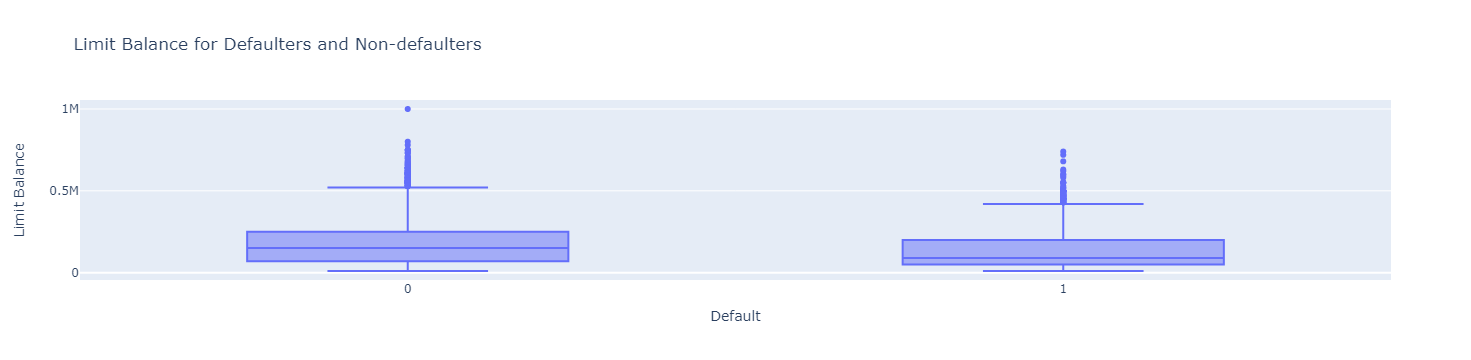

In [772]:
#BOX PLOT - Plot the distribution of `LIMIT_BAL` per defaulters and non-defaulters. Comment the results.

fig2 = px.box(train_macrotable,
             x = 'DEFAULT_JULY' ,
             y= 'LIMIT_BAL',
            title="Limit Balance for Defaulters and Non-defaulters",
            labels={'DEFAULT_JULY':'Default','LIMIT_BAL':'Limit Balance'},
             )
fig2.show()


### **Question 3**

(1 point)

Include 3 more interesting insights extracted from the data. Provide an explanation of the choices made and the results obtained.

In [29]:
import os
from pandas_profiling import ProfileReport

C:\Users\niels\AppData\Local\Temp\ipykernel_2240\515364099.py:2: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [30]:
os.makedirs("../profiling", exist_ok=True)
ProfileReport(train_macrotable).to_file(f"../profiling/train_macrotable.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Profiling Report was not as useful as initially expected, better yet try to understand the data.
# We can extract insights about customers that have payment delays. 
# We can look at the total number of clients that has payment delay every number

### Insght 1

In [773]:
# The amount of customers in the dataset that had a payment deylay of a month or more (as a mask)
train_macrotable.loc[:,'PAY_JUNE':'PAY_JANUARY' ][train_macrotable.loc[:,'PAY_JUNE':'PAY_JANUARY'] >= 1].count() 

PAY_JUNE        4512
PAY_MAY         2937
PAY_APRIL       2800
PAY_MARCH       2299
PAY_FEBRUARY    1944
PAY_JANUARY     2049
dtype: int64

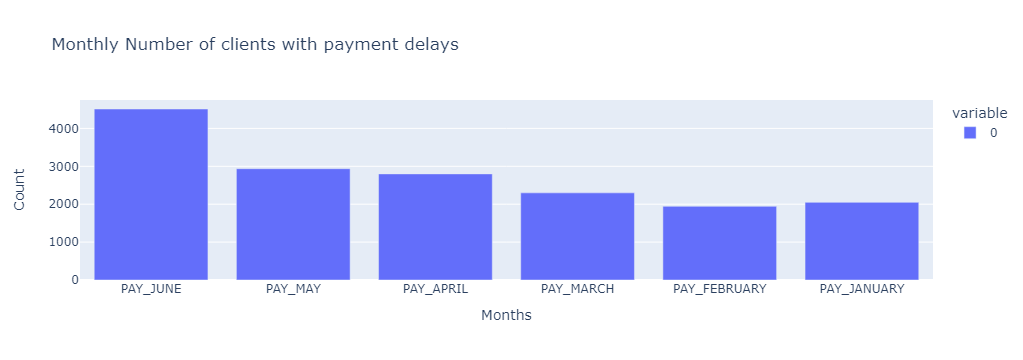

In [775]:
fig3 = px.bar(train_macrotable.loc[:,'PAY_JUNE':'PAY_JANUARY' ][train_macrotable.loc[:,'PAY_JUNE':'PAY_JANUARY'] >= 1].count(),
            title= 'Monthly Number of clients with payment delays',
              labels={'value':'Count','index':'Months'}
             )
fig3.show()

> The table above shows the number of clients with payment delay greater or eaqual to 1 in each separate month. The number of delayed payments is increasing over time. arguably it can be said that customers with payment delays in january forexample may naturally have payment delay -1 in the consecutive month. However this is not strictly the case, revision of the data shows that some clients may have payment delay of 5 months in january to 2 months in february. Further investigation would require looking into the sums billed and paid in each month. 

> Never the less, it is likely that customers who have payment delay greater or equal to one month and are still given credit are likely to have the same problems or worse in the consecutive month. Its easier for customers to delay payment for a month or more than it is to pay back a delayed fee plus a current months billed amount. It is expected therefore that throughout the upcoming months the count of customers with payment delay greater or equal to one month will increase. It would be wise to reconsider the basis on which credit is issued.


> The following insihgts are pie charts looking more closely at demographic profiles of customers that had a payment delay of one month or greater in ANY of the months January through June. 

In [776]:
# Data Frame with customers that had a payment delay of one or more periods in any month June through Januray
delayed_clients = train_macrotable[(train_macrotable.loc[:,'PAY_JUNE':'PAY_JANUARY'] >= 1).any(axis=1)]

In [778]:
demographic_cols = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
delay_client_demo = delayed_clients[demographic_cols]
delay_client_demo.sample(3)

,ID,SEX,EDUCATION,MARRIAGE,AGE
16456,15692,2,1,1,27
2237,12300,1,2,2,30
15098,3251,2,3,1,47


In [779]:
education_map = {
    0: 'unknown',
    1: 'graduate school', 
    2: 'university' , 
    3 : 'high school', 
    4: 'others', 
    5: 'unknown',
    6:'unknown'
}

In [780]:
gender_map = {
    1: 'male',
    2: 'female',
}

In [781]:
marriage_map = {
    0: 'unknown',
    1: 'married',
    2: 'single',
    3: 'others',
}

In [783]:
delay_client_demo['SEX'] = delay_client_demo['SEX'].map(gender_map)
delay_client_demo['EDUCATION'] = delay_client_demo['EDUCATION'].map(education_map)
delay_client_demo['MARRIAGE'] = delay_client_demo['MARRIAGE'].map(marriage_map)

C:\Users\niels\AppData\Local\Temp\ipykernel_2240\556726526.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\niels\AppData\Local\Temp\ipykernel_2240\556726526.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\niels\AppData\Local\Temp\ipykernel_2240\556726526.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [785]:
delay_client_demo.sample(3)

,ID,SEX,EDUCATION,MARRIAGE,AGE
15523,12852,male,high school,married,41
14298,14912,male,graduate school,single,24
18024,10048,female,high school,single,29


### Insight 2

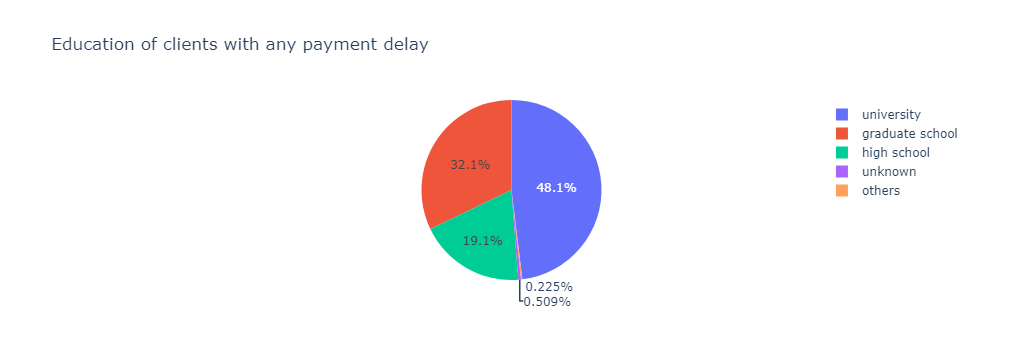

In [ ]:

fig4 = px.pie(delay_client_demo.groupby('EDUCATION').count().reset_index(), #apply a map 
              values= 'ID',
              names='EDUCATION',
              labels= 'EDUCATION',
              title= 'Education of clients with any payment delay'
             )
fig4.show()



> Much as the insights from Q1 showed, the majority of defaulters and in this case the share of clients that ever had any payment delay, consists of university graduates (48.1%). It is evident that cleints with the two highest levels of education (graduate school and university) represent the majority (80.2%) of clients that ever had any payment delays on their credit. Looking more closely at the distribution of these two levels of education amongst all clients revealed that they do infact make up the greatest share of the clientele in the dataset in the first place (university 46.5%, graduate school 35.4%, see hidden cell below). More intrestingly however is the highschool class which in the entire dataset represented 16.5% whilst they represented 19.1% in the dataframe filtered for clients with any payment delays. 

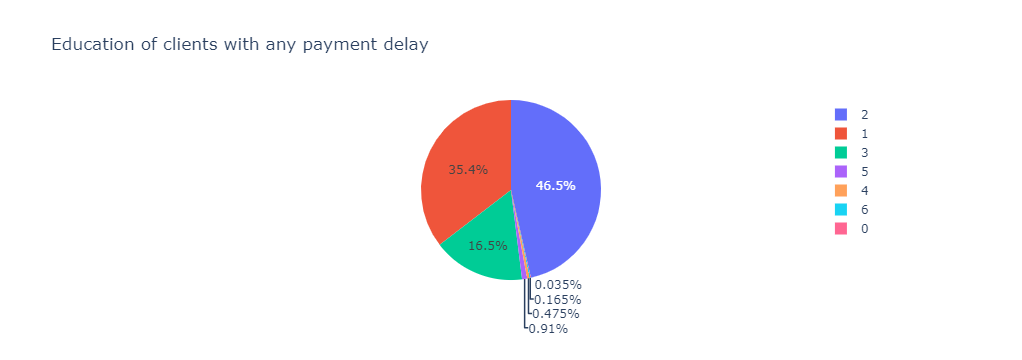

In [808]:
fig4 = px.pie(train_macrotable.groupby('EDUCATION').count().reset_index(), 
              values= 'ID',
              names='EDUCATION',
              labels= 'EDUCATION',
              title= 'Education of clients with any payment delay'
             )
fig4.show()

### Insight 3

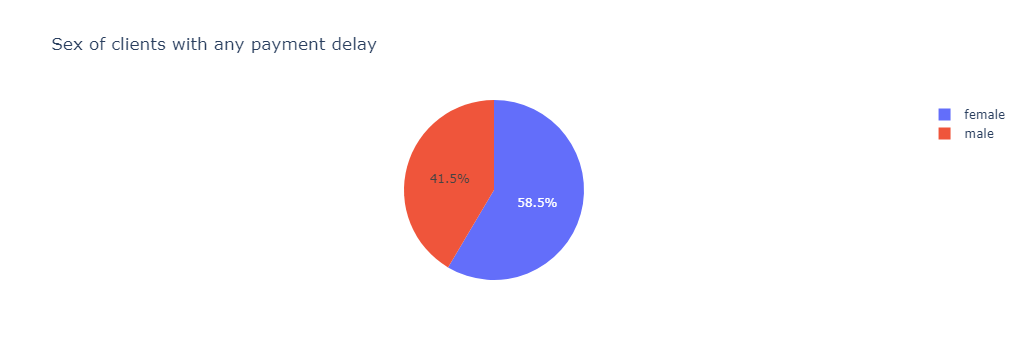

In [791]:
fig5 = px.pie(delay_client_demo.groupby('SEX').count().reset_index(), #apply a map 
              values= 'ID',
              names='SEX',
              labels= 'SEX', 
              title= 'Sex of clients with any payment delay'
             )
fig5.show()

> Similarly i looked at the SEX category and did a group by to count each category. Amongst the the customers that ever had any payment delay females represented 58.5% and males 41.5% of the dataset. This compared to 60.6% females and 39.4% males in the entire data set (see hidden cell for entire dataset). Considering that the share of woemn represented in the query is smaller one could also assume that a women makes a more reliable credit holder who may be more likely to never use credit or pay back her loan duly (atleast the minimal amount).

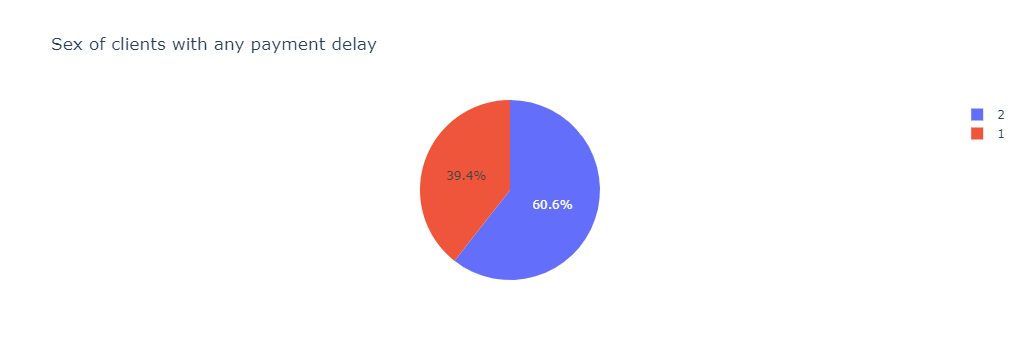

In [810]:
fig5 = px.pie(train_macrotable.groupby('SEX').count().reset_index(), #apply a map 
              values= 'ID',
              names='SEX',
              labels= 'SEX', 
              title= 'Sex of clients with any payment delay'
             )
fig5.show()

### Insight 4

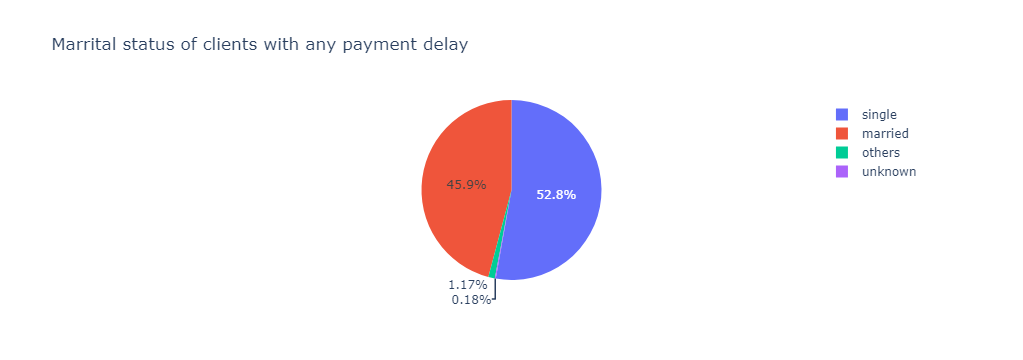

In [792]:
fig6 = px.pie(delay_client_demo.groupby('MARRIAGE').count().reset_index(), #apply a map 
              values= 'ID',
              names='MARRIAGE',
              labels= 'MARRIAGE', 
              title= 'Marrital status of clients with any payment delay'
             )
fig6.show()

> Lastly i looked at the last demographic column amongst customers filtered for the same query: where they had a payment delay of one month or greater in any of the columns representing the months. The share of customers in different marrital categories with payment delays is represented almost identically as they are in the entire dataset (only 0.2% difference). We can therefore assume that this category will of little importance to a clients ability to repay credit duly

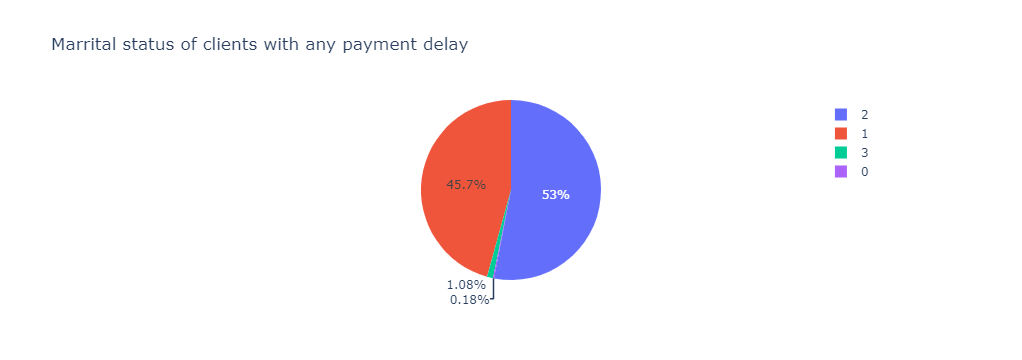

In [811]:
fig6 = px.pie(train_macrotable.groupby('MARRIAGE').count().reset_index(), #apply a map 
              values= 'ID',
              names='MARRIAGE',
              labels= 'MARRIAGE', 
              title= 'Marrital status of clients with any payment delay'
             )
fig6.show()

## **C. MACHINE LEARNING (5 points)**

### Build the model

In [458]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, cross_validate , cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, auc, roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [163]:
features_df = train_macrotable.drop('DEFAULT_JULY', axis = 1)
target = train_macrotable['DEFAULT_JULY']

#### Standardizing data

In [459]:
# Copy the DF
std_data = features_df

#Exclude /include certain columns
exclude_cols = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE'] # Exclude the categorical columns from standardization

cols_to_scale = [col for col in features_df.columns if col not in exclude_cols]

# Initiate the standard scaler
std_scaler = StandardScaler()

# Apply the scaler to the relevant columns
std_data[cols_to_scale] = std_scaler.fit_transform(std_data[cols_to_scale])

std_data.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
14767,20655,0.323959,1,2,1,1.138150,-1.767840,-1.561144,-1.532447,-1.523328,...,-0.663977,-0.672140,-0.662881,-0.651317,-0.230513,-0.219393,-0.285565,-0.302872,-0.309493,-0.309719
4303,6632,0.323959,2,1,1,-0.270224,-1.767840,-1.561144,-1.532447,-1.523328,...,-0.661371,-0.664406,-0.641847,-0.642966,0.020933,-0.211571,-0.258808,-0.223621,-0.277433,-0.279136
3827,15739,-0.600638,1,3,2,1.571496,0.015605,0.112601,0.138842,0.193630,...,0.186515,0.169939,0.087793,0.048110,-0.146973,-0.149556,-0.187098,-0.198480,-0.184201,-0.218153


# Machine Learning Models
> Standardized data will be passed through Logistic Regression, XGBoost and Random Forest ML Models. The metric used to evaluate the model is the roc_auc.

In [432]:
# Cross Validation Settings. 
randstate = 12
kfolds = 10

In [434]:
# Cross validattion settings

kf = KFold(n_splits=kfolds, shuffle=True, random_state=randstate)
scoring = ["precision", "recall", "f1", "accuracy", "roc_auc"]

### LOGISTIC REGRESSION

In [446]:
# Build a Logistic Regression Model on the train data
logreg = LogisticRegression(C=0.56, max_iter =200)
logreg.fit(std_data, target)

LogisticRegression(C=0.56, max_iter=200)

In [444]:
grid_param = {
    'C' : [0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59,0.6]
}

In [445]:
clf = GridSearchCV(logreg, grid_param, n_jobs=-2)
clf.fit(std_data, target)
clf.best_estimator_

LogisticRegression(C=0.56, max_iter=200)

### XG BOOST 

In [542]:
xgboost = XGBClassifier(booster= 'gbtree', n_estimators=31, max_depth=2, gamma= 5, reg_alpha= 4, reg_lambda= 6, colsample_bytree= 0.5, subsample= 0.65)
xgboost.fit(std_data, target)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=31, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [807]:
grid_param = {
    #'n_estimators' : list(range(21,40)),
    #'max_depth' : list(range(1,4)),
    #'max_leaves': list(range(0,10)),
    #'subsample' : [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.50, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.90, 0.95, 0.99 ],
    #'colsample_bytree': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.50, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.90, 0.95, 0.99 ],
    #'reg_alpha' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'reg_lambda': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'min_child_weight': [2, 4, 6, 8]
}

In [553]:
clf = GridSearchCV(xgboost, grid_param, n_jobs=-1)
clf.fit(std_data, target)
clf.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=0,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=31, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [554]:
best_params = clf.best_params_
best_params

{'max_leaves': 0}

### DECISION TREE

In [379]:
dec_tree = DecisionTreeClassifier(random_state= randstate, max_depth=2, max_leaf_nodes=4, min_samples_leaf=2)
dec_tree.fit(std_data, target)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, min_samples_leaf=2,
                       random_state=12)

In [423]:
grid_param = {
    'max_depth' : list(range(1,5)), 
    'max_leaf_nodes' : list(range(2,6)), 
    'min_samples_leaf' : list(range(2,6)),
}

In [424]:
clf = GridSearchCV(dec_tree, grid_param, n_jobs=-1)
clf.fit(std_data, target)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4,
                                              min_samples_leaf=2,
                                              random_state=12),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_leaf_nodes': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5]})

In [425]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, min_samples_leaf=2,
                       random_state=12)

max_depth: 1, train acc: 0.820, test acc: 0.820
max_depth: 2, train acc: 0.821, test acc: 0.821
max_depth: 3, train acc: 0.823, test acc: 0.820
max_depth: 4, train acc: 0.824, test acc: 0.821
max_depth: 5, train acc: 0.826, test acc: 0.820
max_depth: 6, train acc: 0.829, test acc: 0.818
max_depth: 7, train acc: 0.834, test acc: 0.817
max_depth: 8, train acc: 0.839, test acc: 0.814
max_depth: 9, train acc: 0.847, test acc: 0.810
max_depth: 10, train acc: 0.856, test acc: 0.803
max_depth: 11, train acc: 0.866, test acc: 0.800


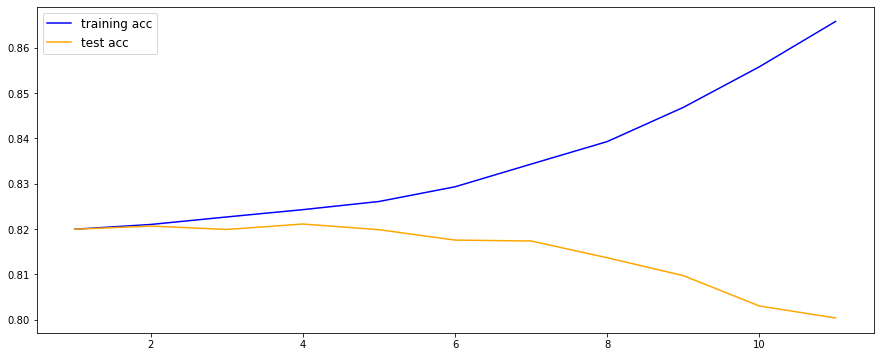

In [344]:
max_depth_range = range(1, 12,)

cv_results = []

# looping through values of max_depth
for max_depth in max_depth_range:
    
    # parameters
    parameters = {
        "max_depth": max_depth, 
        "random_state": randstate
    }

    # train
    dec_tree = DecisionTreeClassifier(**parameters)
    dec_tree.fit(std_data, target)
    
    #Scoring
    
    scores = cross_validate(dec_tree, std_data, target, cv=kfolds, return_train_score=True)
    
    # store results
    cv_results.append({
        "max_depth": max_depth, 
        "train_score": scores["train_score"].mean(),
        "test_score": scores["test_score"].mean()
    })
     
    
    # print evolution of loop:
    print(f"max_depth: {max_depth}, train acc: {scores['train_score'].mean():.3f}, test acc: {scores['test_score'].mean():.3f}")

    
# saving results as dataframe
results = pd.DataFrame(cv_results)

# plotting
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(results["max_depth"], results["train_score"], label="training acc", color="blue")
ax.plot(results["max_depth"], results["test_score"], label="test acc", color="orange")

ax.legend(fontsize=12)

plt.show()

### RANDOM FOREST

In [569]:
rnd_forest = RandomForestClassifier(max_depth=7, n_estimators=123, criterion= 'entropy')
rnd_forest.fit(std_data, target)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=123)

In [573]:
grid_param = {
    #"n_estimators": list(range(70,130)),
    #"criterion": ["gini", "entropy"],
    #"max_depth": list(range(1,10)),
    #"min_samples_split": [2, 5, 10],
    #"min_samples_leaf": [1, 2, 3, 4],
    #"ccp_alpha": [0.0, 0.1, 0.2,0.3, 0.4, 0.5, 1]
}

In [567]:

clf = GridSearchCV(rnd_forest, grid_param, n_jobs=-1)
clf.fit(std_data, target)
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=123)

In [ ]:
#max_depth=7, max_features=5, n_estimators=156
#max_depth=8, n_estimators=158

In [568]:
clf.best_params_

{'max_depth': 7, 'n_estimators': 123}

### TRAIN PERFORMANCE CV

In [478]:
# Logreg Model 
logreg_std_scores = cross_validate(logreg, std_data, target, cv=kf, scoring=scoring, return_estimator= True)
lr_mean_auc = logreg_std_scores['test_roc_auc'].mean()
lr_fpr, lr_tpr, _ = roc_curve(target, logreg.predict_proba(std_data)[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

In [575]:
# XGBoost Model
xgb_scores = cross_validate(xgboost, std_data, target, cv=kf, scoring=scoring, return_estimator= True)
xgb_mean_auc = xgb_scores['test_roc_auc'].mean()
xgb_fpr, xgb_tpr, _ = roc_curve(target, xgboost.predict_proba(std_data)[:,1])
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

In [455]:
# Dec. Tree Model
dect_scores = cross_validate(dec_tree, std_data, target, cv=kf, scoring=scoring, return_estimator= True)
dt__mean_auc = dect_scores['test_roc_auc'].mean()
dt_fpr, dt_tpr, _ = roc_curve(target, dec_tree.predict_proba(std_data)[:,1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

In [570]:
# Rnd Forest Model 
rf_scores = cross_validate(rnd_forest, std_data, target, cv=kf, scoring=scoring, return_estimator= True)
rf_mean_auc = rf_scores['test_roc_auc'].mean()
rf_fpr, rf_tpr, _ = roc_curve(target, rnd_forest.predict_proba(std_data)[:,1])
rf_roc_auc = auc(rf_fpr, rf_tpr)


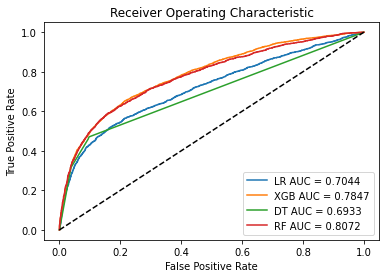

In [576]:
plt.plot(lr_fpr, lr_tpr, label= f'LR AUC = {lr_roc_auc:.4f}') # LogReg
plt.plot(xgb_fpr, xgb_tpr, label= f'XGB AUC = {xgb_roc_auc:.4f}') # XGBoost
plt.plot(dt_fpr, dt_tpr, label= f'DT AUC = {dt_roc_auc:.4f}') # Decision Tree
plt.plot(rf_fpr, rf_tpr, label= f'RF AUC = {rf_roc_auc:.4f}') # Random Forest

plt.plot([0, 1], [0, 1], 'k--') # Professors Dumb Model

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

## TEST PERFORMANCE

In [400]:
test_data = pd.read_csv('test_data.csv')
X_test = test_data.drop('DEFAULT_JULY', axis= 1)
y_test = test_data['DEFAULT_JULY']

In [813]:
# Copy the DF
X_std_test = X_test

#Exclude certain columns
exclude_cols = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE'] # Exclude the categorical columns from standardization

# Initiate the standard scaler
std_scaler = StandardScaler()

# Make a list with columns that will be standardized
cols_to_scale = [col for col in X_test.columns if col not in exclude_cols]

# Apply the scaler to the relevant columns
X_std_test[cols_to_scale] = std_scaler.fit_transform(X_std_test[cols_to_scale])

X_std_test.sample(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
5910,21708,-1.12931,2,1,2,-1.458858,0.016096,0.111754,0.139325,0.178655,...,-0.408794,-0.394663,-0.46165,-0.490649,-0.221147,-0.200663,-0.236086,-0.253185,-0.296534,-0.196065


In [466]:
rnd_forest

RandomForestClassifier(max_depth=8, max_features=5, n_estimators=154)

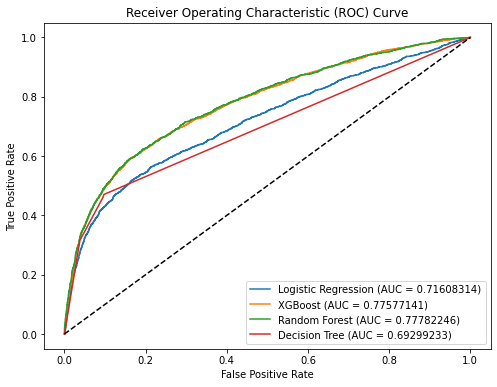

In [814]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, logreg.predict_proba(X_std_test)[:,1])
lr_auc = auc(lr_fpr, lr_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgboost.predict_proba(X_std_test)[:,1])
xgb_auc = auc(xgb_fpr, xgb_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rnd_forest.predict_proba(X_std_test)[:,1])
rf_auc = auc(rf_fpr, rf_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dec_tree.predict_proba(X_std_test)[:,1])
dt_auc = auc(dt_fpr, dt_tpr)

plt.figure(figsize=(8, 6))

plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.8f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.8f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.8f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.8f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()


##  🏆Winning Model🏆

In [812]:
rnd_forest

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=123)

### **Question 1**

(1.5 points)

In [578]:
submi_data = pd.read_csv("submission_features.csv")

exclude_cols = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE'] 
cols_to_scale = [col for col in submi_data.columns if col not in exclude_cols]

std_scaler = StandardScaler()

submi_data[cols_to_scale] = std_scaler.fit_transform(submi_data[cols_to_scale])

submi_data.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
498,17560,-0.909357,1,1,2,0.124403,-0.010367,0.094601,0.135152,0.183071,...,-0.177105,-0.216511,-0.182129,-0.166666,-0.263564,-0.267648,-0.275834,-0.240969,-0.234059,-0.249889
729,11659,0.084328,1,2,2,-1.084457,-0.010367,0.094601,0.135152,0.183071,...,0.184386,0.265852,0.352234,0.409451,-0.048869,-0.124007,-0.064811,-0.053841,-0.054145,-0.069260
299,16613,-1.215106,2,3,2,1.662952,-0.010367,0.094601,0.135152,0.183071,...,-0.643379,-0.581697,-0.602524,-0.699560,-0.250124,-0.300905,-0.176661,-0.300253,-0.298262,-0.311878


In [584]:
rnd_forest

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=123)

In [580]:
pred = rnd_forest.predict_proba(submi_data)[:,1]
pred

array([0.18407376, 0.42214424, 0.35216949, 0.18907896, 0.13171645,
       0.2633149 , 0.18360136, 0.11733226, 0.16137704, 0.10278721,
       0.80222085, 0.19782791, 0.30688878, 0.60834701, 0.25563852,
       0.07884641, 0.11758871, 0.13761512, 0.0907992 , 0.15518107,
       0.09874818, 0.1067674 , 0.08029814, 0.09325183, 0.13813557,
       0.13453318, 0.20909579, 0.41832574, 0.21740859, 0.09465008,
       0.29139719, 0.19042738, 0.6702698 , 0.22822861, 0.1089249 ,
       0.21240817, 0.75229764, 0.5756711 , 0.13728795, 0.12206441,
       0.16832245, 0.13189179, 0.19576499, 0.53691738, 0.39993014,
       0.31590904, 0.18842369, 0.0840191 , 0.11033486, 0.15832629,
       0.66839195, 0.52787739, 0.18902381, 0.14790455, 0.39986356,
       0.18501371, 0.33899223, 0.25545706, 0.15147336, 0.11788589,
       0.09308804, 0.19614458, 0.14845539, 0.24869085, 0.24138337,
       0.17575365, 0.12599262, 0.17315773, 0.07640164, 0.65410318,
       0.15215665, 0.16400501, 0.12818049, 0.19541892, 0.22026

In [737]:
# Create output dataframe
submi_df = pd.DataFrame({
    'ID': submi_data['ID'],
    'probability': pred
})
submi_df.sample(1)

,ID,probability
564,7200,0.724332


In [595]:
# Save predictions to a CSV file
submi_df.to_csv('mysubmissions/vanmeijelniels_C1_submission.csv', index=False)

### **Question 2**

(1 points)

In [596]:
submi_df.shape

(1000, 2)

In [815]:
top5_df = submi_df.sort_values('probability', ascending= True).head(5)
top5_df

,ID,probability
185,9331,0.053889
889,17142,0.055883
851,2665,0.056155
294,5735,0.056691
131,19617,0.058539


> Which five of 1000 clients from the submission set are most likely to repay the loan if it were granted?

In [816]:
list(top5_df['ID'])

[9331, 17142, 2665, 5735, 19617]

### **Question 3**

(2.5 points)

In [738]:
# CONFUSION MATRIX
# PRED: 0 ACTU: 1 = FN -5000
# PRED: 0 ACTU: 0 = TN +1000
# PRED: 1 ACTU:1 = TP = 0
# PRED 1 ACTU 0 = FP no credit issued (lost client) 

### USE YOUR TEEEST SET FOR CALCULATIONS!!!

#X_std_test is the dataset you need
#Make a DF with predict proba of rndforest and y test 

## Make a list with thresholds between 0-1 
# for each threshold start a loop
    # XXX binary preds for thres = if value in cell is greater of equal to thresh then 1 otherwise 0
    #tn, fp, fn, tp = confusion_matrix(y_test, XXX).ravel()
    # profit = (tn * 1000) - fn * (5000)
    # append the threshold to a list
    # append the profit to a list 
    
# make df with thes list and profit list 
# df['profit'].max()
# Bingo bango

In [605]:
test_preds_act = pd.DataFrame({
    'ID': X_std_test['ID'],
    'prediction': rnd_forest.predict_proba(X_std_test)[:, 1], 
    'actual': y_test
})
test_preds_act

,ID,prediction,actual
0,11316,0.156804,0
1,26420,0.249952,0
2,7847,0.121917,0
3,8083,0.115345,0
4,7455,0.500682,0
...,...,...,...
8995,26591,0.116592,0
8996,10501,0.696919,1
8997,5883,0.196019,0
8998,12403,0.080536,0


In [626]:
thresholds = np.linspace(0, 0.99,101)
thresholds

array([0.    , 0.0099, 0.0198, 0.0297, 0.0396, 0.0495, 0.0594, 0.0693,
       0.0792, 0.0891, 0.099 , 0.1089, 0.1188, 0.1287, 0.1386, 0.1485,
       0.1584, 0.1683, 0.1782, 0.1881, 0.198 , 0.2079, 0.2178, 0.2277,
       0.2376, 0.2475, 0.2574, 0.2673, 0.2772, 0.2871, 0.297 , 0.3069,
       0.3168, 0.3267, 0.3366, 0.3465, 0.3564, 0.3663, 0.3762, 0.3861,
       0.396 , 0.4059, 0.4158, 0.4257, 0.4356, 0.4455, 0.4554, 0.4653,
       0.4752, 0.4851, 0.495 , 0.5049, 0.5148, 0.5247, 0.5346, 0.5445,
       0.5544, 0.5643, 0.5742, 0.5841, 0.594 , 0.6039, 0.6138, 0.6237,
       0.6336, 0.6435, 0.6534, 0.6633, 0.6732, 0.6831, 0.693 , 0.7029,
       0.7128, 0.7227, 0.7326, 0.7425, 0.7524, 0.7623, 0.7722, 0.7821,
       0.792 , 0.8019, 0.8118, 0.8217, 0.8316, 0.8415, 0.8514, 0.8613,
       0.8712, 0.8811, 0.891 , 0.9009, 0.9108, 0.9207, 0.9306, 0.9405,
       0.9504, 0.9603, 0.9702, 0.9801, 0.99  ])

In [662]:
big_bucks = []
threshold_ls = []
TN = []
FP = []
FN = []
TP = []

for t in thresholds:
    
    binary_pred_for_t = [1 if pred >= t else 0 for pred in test_preds_act['prediction']]
    
    tn, fp, fn, tp = confusion_matrix(y_test, binary_pred_for_t).ravel()
    
    profit = (tn * 1000) + (fn * -5000)

    big_bucks.append(profit)
    threshold_ls.append(t)
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    
    #print(f't = {t}, TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}, Profit ={profit}.\n')
    
profits_for_t = pd.DataFrame({
    'TN': TN,
    'FP': FP,
    'FN': FN,
    'TP': TP,
    'Thresholds': threshold_ls, 
    'Profits': big_bucks
})
profits_for_t['Profits'].idxmax()

19

In [660]:
profits_for_t.iloc[15:25,]

,TN,FP,FN,TP,Thresholds,Profits
15,3592,3413,345,1650,0.1485,1867000
16,4014,2991,421,1574,0.1584,1909000
17,4358,2647,474,1521,0.1683,1988000
18,4656,2349,533,1462,0.1782,1991000
19,4922,2083,570,1425,0.1881,2072000
20,5142,1863,634,1361,0.1980,1972000
21,5311,1694,672,1323,0.2079,1951000
22,5456,1549,708,1287,0.2178,1916000
23,5609,1396,746,1249,0.2277,1879000
24,5721,1284,776,1219,0.2376,1841000


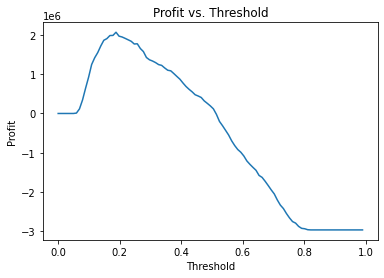

In [658]:

# Create a line plot of profits vs. thresholds
plt.plot(profits_for_t['Thresholds'], profits_for_t['Profits'])

# Add labels and title
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.title('Profit vs. Threshold')

# Show the plot
plt.show()

### More Thresholds

In [684]:
more_thresholds = np.linspace(0.1830, 0.1885,101)
more_thresholds

array([0.183   , 0.183055, 0.18311 , 0.183165, 0.18322 , 0.183275,
       0.18333 , 0.183385, 0.18344 , 0.183495, 0.18355 , 0.183605,
       0.18366 , 0.183715, 0.18377 , 0.183825, 0.18388 , 0.183935,
       0.18399 , 0.184045, 0.1841  , 0.184155, 0.18421 , 0.184265,
       0.18432 , 0.184375, 0.18443 , 0.184485, 0.18454 , 0.184595,
       0.18465 , 0.184705, 0.18476 , 0.184815, 0.18487 , 0.184925,
       0.18498 , 0.185035, 0.18509 , 0.185145, 0.1852  , 0.185255,
       0.18531 , 0.185365, 0.18542 , 0.185475, 0.18553 , 0.185585,
       0.18564 , 0.185695, 0.18575 , 0.185805, 0.18586 , 0.185915,
       0.18597 , 0.186025, 0.18608 , 0.186135, 0.18619 , 0.186245,
       0.1863  , 0.186355, 0.18641 , 0.186465, 0.18652 , 0.186575,
       0.18663 , 0.186685, 0.18674 , 0.186795, 0.18685 , 0.186905,
       0.18696 , 0.187015, 0.18707 , 0.187125, 0.18718 , 0.187235,
       0.18729 , 0.187345, 0.1874  , 0.187455, 0.18751 , 0.187565,
       0.18762 , 0.187675, 0.18773 , 0.187785, 0.18784 , 0.187

In [685]:
big_bucks = []
threshold_ls = []
TN = []
FP = []
FN = []
TP = []

for t in more_thresholds:
    binary_pred_for_t = [1 if pred >= t else 0 for pred in test_preds_act['prediction']]
    tn, fp, fn, tp = confusion_matrix(y_test, binary_pred_for_t).ravel()
    profit = (tn * 1000) + (fn * -5000)
    big_bucks.append(profit)
    threshold_ls.append(t)
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    
    #print(f't = {t}, TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}, Profit ={profit}.\n')
    
more_profits_for_t = pd.DataFrame({
    'TN': TN,
    'FP': FP,
    'FN': FN,
    'TP': TP,
    'Thresholds': threshold_ls, 
    'Profits': big_bucks
})
more_profits_for_t['Profits'].idxmax()

90

In [686]:
more_profits_for_t.iloc[80:100,]

,TN,FP,FN,TP,Thresholds,Profits
80,4906,2099,567,1428,0.187400,2071000
81,4906,2099,567,1428,0.187455,2071000
82,4906,2099,567,1428,0.187510,2071000
83,4906,2099,567,1428,0.187565,2071000
84,4909,2096,567,1428,0.187620,2074000
85,4913,2092,567,1428,0.187675,2078000
86,4914,2091,567,1428,0.187730,2079000
87,4916,2089,568,1427,0.187785,2076000
88,4916,2089,568,1427,0.187840,2076000
89,4919,2086,568,1427,0.187895,2079000


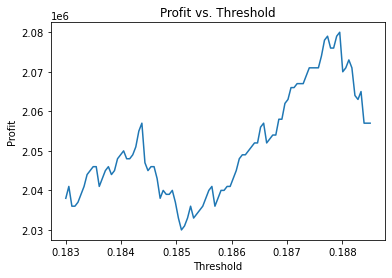

In [688]:
# Create a line plot of profits vs. thresholds
plt.plot(more_profits_for_t['Thresholds'], more_profits_for_t['Profits'])

# Add labels and title
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.title('Profit vs. Threshold')

# Show the plot
plt.show()